In [1]:
import wannierberri as wberri
print (f"Using WannierBerri version {wberri.__version__}")
import pythtb
import numpy as np
import matplotlib.pyplot as plt

Using WannierBerri version 0.14.1


In [2]:
parallel = wberri.Parallel()

2023-11-01 16:07:23,356	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


In [3]:
mass = 2.0   # in units Ang^2/eV
t= 0.1
v=1.
m = 0.1
sigmax = np.array([[0.,1.],[1.,0.]])
sigmay = np.array([[0,-1.j],[1.j,0]])
sigmaz = np.array([[1.,0.],[0.,-1.]])
def ham(k):
    return np.array( t*k[0] + v*k[0]*sigmax + v*k[1]*sigmay + m*sigmaz)

# k.p model is bounded to a box of size 2*kmax
def derham(k):
    res= np.zeros((2,2,3),dtype='complex' )
    res[:,:,0] = t + v*sigmax
    res[:,:,1] = v*sigmay
    res[:,:,2] = np.zeros( (2,2) )
    return res

def der2ham(k):
    res= np.zeros((2,2,3,3),dtype='complex' )
    return rese

system_kp = wberri.system.SystemKP(Ham=ham,
                                   kmax=2,periodic=(True,True,False) )

Number of wannier functions: 2


In [6]:
system_kp.periodic

array([ True,  True, False])

In [8]:
path=wberri.Path(system_kp,
                 k_nodes=[
        [0.0000, 0.0000],   #  G
        [1.0 ,0],   #  G
        #[0.0, 0.0, 0.0],   #  G
        #[0.0,1.0,0.0]   #  G
                 ] ,
                 labels=["G0","G111","G011","G010"],
                 length=200 )   # length [ Ang] ~= 2*pi/dk

tabulators = { "Energy": wberri.calculators.tabulate.Energy(),
             }

tab_all_path = wberri.calculators.TabulatorAll(
                    tabulators,
                    # ibands = np.arange(0,18),
                    mode = "path"
                        )

AssertionError: 

In [5]:
result=wberri.run(system_kp,
                  grid=path,
                  calculators = {"tabulate" : tab_all_path},
                  #parallel = parallel,
                  print_Kpoints = False)

#print (result.results)
path_result = result.results["tabulate"]

Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.TabulatorAll object at 0x7fd40ae2cc70>
All calculators are compatible
Symmetrization switched off for Path
Grid is regular
The set of k points is a Path() with 128 points and labels {0: 'G0', 127: 'G111'}
generating K_list
Done 
Done, sum of weights:128.0
symgroup : None
processing 128 K points : in serial.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    128 K-points in serial:     0.0666 ; per K-point          0.0005 ; proc-sec per K-point          0.0005
time1 =  0.0069959163665771484
Totally processed 128 K-points 


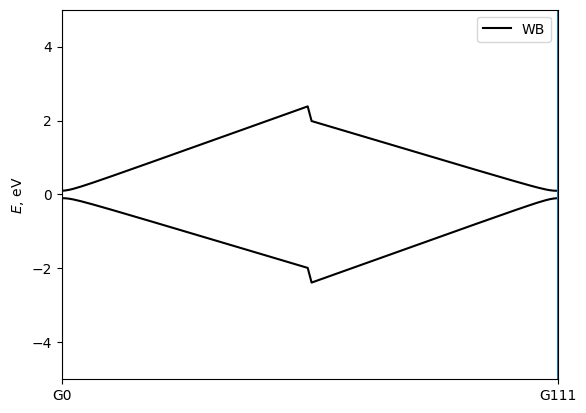

In [6]:
path_result = result.results["tabulate"]

plt.close()
path_result.plot_path_fat( path,
              quantity=None,
#              Eshift=EF,
              Emin=-5,  Emax=5,
              iband=None,
              mode="fatband",
              fatfactor=20,
              cut_k=False,
              close_fig=False,
              show_fig=False,
              label = "WB"
              )

kline = path.getKline()
#plt.plot(kline,kline**2/(2*mass),"--",label="k**2/(2*mass)")

plt.legend()
plt.show()
plt.close()

In [7]:
res = []
de = 0.5/100.
for i in range(100):
    Ef = i*de
    Efermi = np.array([Ef])
    calculators = { #"BCD":wberri.calculators.static.BerryDipole_kp(Efermi=Efermi, tetra=True ),
                   "X1":wberri.calculators.static.X1(Efermi=Efermi, tetra=True, 
                                                 kwargs_formula={"Ef": Ef,"Gamma": 0.2j} ) ,
                   "X2":wberri.calculators.static.X2(Efermi=Efermi, tetra=True, 
                                                 kwargs_formula={"Ef": Ef,"Gamma": 0.2j} ) ,
                  }
    grid = wberri.Grid(system_kp, NK=[100,100,1], NKFFT=[10,10,1] )
    result_run = wberri.run(system_kp,
            grid=grid,
            calculators = calculators,
            parallel=parallel,
            adpt_num_iter=0,
            fout_name='kp',
            restart=False,
            #print_Kpoints=False
            #file_Klist="Klist_ahc.pickle"  # needed to restart a calculation in future
            )
    res.append( #result_run.results["BCD"].data )
        result_run.results["X1"].data
                + result_run.results["X2"].data )
    print('############################################',i)

calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.002599954605102539 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008451700210571289 s 
Done in 0.008801698684692383 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.000000 ,    0.000000 ], refinement level:0, factor = 0.01dK=[0.1 0.1 1. ]  
 K-point 1 : coord in rec.lattice = [   0.000000  ,   0.100000 ,    0.000000 ], refinement level:0, factor = 0.01dK=[0.1 0.1 1. ]  
 K-point 2 : coord in rec.lattice =

time for processing    100 K-points on   8 processes:     5.3090 ; per K-point          0.0531 ; proc-sec per K-point          0.4247
time1 =  0.007497072219848633
Totally processed 100 K-points 
############################################ 0
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0036962032318115234 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006392002105712891 s 
Done in 0.006867885589599609 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.3375 ; per K-point          0.0134 ; proc-sec per K-point          0.1070
time1 =  0.008457183837890625
Totally processed 100 K-points 
############################################ 1
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003548860549926758 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0079498291015625 s 
Done in 0.008069753646850586 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.00

time for processing    100 K-points on   8 processes:     1.1771 ; per K-point          0.0118 ; proc-sec per K-point          0.0942
time1 =  0.010306835174560547
Totally processed 100 K-points 
############################################ 2
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003705739974975586 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0056610107421875 s 
Done in 0.005856037139892578 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.00

time for processing    100 K-points on   8 processes:     1.1984 ; per K-point          0.0120 ; proc-sec per K-point          0.0959
time1 =  0.009339094161987305
Totally processed 100 K-points 
############################################ 3
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0024161338806152344 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006250143051147461 s 
Done in 0.006602048873901367 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.2080 ; per K-point          0.0121 ; proc-sec per K-point          0.0966
time1 =  0.007257938385009766
Totally processed 100 K-points 
############################################ 4
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0037407875061035156 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006318092346191406 s 
Done in 0.006642818450927734 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4345 ; per K-point          0.0143 ; proc-sec per K-point          0.1148
time1 =  0.011469125747680664
Totally processed 100 K-points 
############################################ 5
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0045719146728515625 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.011018037796020508 s 
Done in 0.011170148849487305 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4735 ; per K-point          0.0147 ; proc-sec per K-point          0.1179
time1 =  0.010104179382324219
Totally processed 100 K-points 
############################################ 6
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003160715103149414 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007919073104858398 s 
Done in 0.00838613510131836 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.0

time for processing    100 K-points on   8 processes:     1.3788 ; per K-point          0.0138 ; proc-sec per K-point          0.1103
time1 =  0.0066220760345458984
Totally processed 100 K-points 
############################################ 7
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0025730133056640625 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.00527501106262207 s 
Done in 0.0053751468658447266 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3239 ; per K-point          0.0132 ; proc-sec per K-point          0.1059
time1 =  0.009821891784667969
Totally processed 100 K-points 
############################################ 8
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0037708282470703125 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0074291229248046875 s 
Done in 0.007589101791381836 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3176 ; per K-point          0.0132 ; proc-sec per K-point          0.1054
time1 =  0.006713151931762695
Totally processed 100 K-points 
############################################ 9
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0028901100158691406 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0051457881927490234 s 
Done in 0.00541996955871582 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.3240 ; per K-point          0.0132 ; proc-sec per K-point          0.1059
time1 =  0.007275819778442383
Totally processed 100 K-points 
############################################ 10
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0035181045532226562 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005755901336669922 s 
Done in 0.006036996841430664 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4451 ; per K-point          0.0145 ; proc-sec per K-point          0.1156
time1 =  0.009526968002319336
Totally processed 100 K-points 
############################################ 11
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.005906105041503906 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007052183151245117 s 
Done in 0.007452964782714844 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4202 ; per K-point          0.0142 ; proc-sec per K-point          0.1136
time1 =  0.008670806884765625
Totally processed 100 K-points 
############################################ 12
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0051729679107666016 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008431196212768555 s 
Done in 0.008579015731811523 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.7711 ; per K-point          0.0177 ; proc-sec per K-point          0.1417
time1 =  0.012075185775756836
Totally processed 100 K-points 
############################################ 13
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004814863204956055 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.01125788688659668 s 
Done in 0.011638879776000977 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     1.6200 ; per K-point          0.0162 ; proc-sec per K-point          0.1296
time1 =  0.01071310043334961
Totally processed 100 K-points 
############################################ 14
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0028259754180908203 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006315946578979492 s 
Done in 0.006659984588623047 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4547 ; per K-point          0.0145 ; proc-sec per K-point          0.1164
time1 =  0.011221885681152344
Totally processed 100 K-points 
############################################ 15
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0024471282958984375 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.004819154739379883 s 
Done in 0.005115032196044922 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3394 ; per K-point          0.0134 ; proc-sec per K-point          0.1072
time1 =  0.006879091262817383
Totally processed 100 K-points 
############################################ 16
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004926919937133789 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006318807601928711 s 
Done in 0.006682872772216797 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4153 ; per K-point          0.0142 ; proc-sec per K-point          0.1132
time1 =  0.007257938385009766
Totally processed 100 K-points 
############################################ 17
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003258228302001953 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007215738296508789 s 
Done in 0.007551908493041992 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.3803 ; per K-point          0.0138 ; proc-sec per K-point          0.1104
time1 =  0.008778095245361328
Totally processed 100 K-points 
############################################ 18
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003777742385864258 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0067369937896728516 s 
Done in 0.007063150405883789 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4509 ; per K-point          0.0145 ; proc-sec per K-point          0.1161
time1 =  0.009601116180419922
Totally processed 100 K-points 
############################################ 19
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0042340755462646484 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0050029754638671875 s 
Done in 0.005135059356689453 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,  

time for processing    100 K-points on   8 processes:     5.1980 ; per K-point          0.0520 ; proc-sec per K-point          0.4158
time1 =  0.009095907211303711
Totally processed 100 K-points 
############################################ 20
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003236055374145508 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.00545501708984375 s 
Done in 0.005694866180419922 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     7.1308 ; per K-point          0.0713 ; proc-sec per K-point          0.5705
time1 =  0.008661031723022461
Totally processed 100 K-points 
############################################ 21
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0041348934173583984 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007042884826660156 s 
Done in 0.007205963134765625 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     6.4574 ; per K-point          0.0646 ; proc-sec per K-point          0.5166
time1 =  0.007376909255981445
Totally processed 100 K-points 
############################################ 22
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003136157989501953 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.00492405891418457 s 
Done in 0.005197048187255859 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     1.3261 ; per K-point          0.0133 ; proc-sec per K-point          0.1061
time1 =  0.007409095764160156
Totally processed 100 K-points 
############################################ 23
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0042421817779541016 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005064964294433594 s 
Done in 0.005149126052856445 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.2914 ; per K-point          0.0129 ; proc-sec per K-point          0.1033
time1 =  0.007784843444824219
Totally processed 100 K-points 
############################################ 24
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0029077529907226562 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008156776428222656 s 
Done in 0.008297920227050781 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4230 ; per K-point          0.0142 ; proc-sec per K-point          0.1138
time1 =  0.008746147155761719
Totally processed 100 K-points 
############################################ 25
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0027327537536621094 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.011713981628417969 s 
Done in 0.012106895446777344 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3735 ; per K-point          0.0137 ; proc-sec per K-point          0.1099
time1 =  0.006785154342651367
Totally processed 100 K-points 
############################################ 26
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0026628971099853516 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005875110626220703 s 
Done in 0.006014108657836914 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.2801 ; per K-point          0.0128 ; proc-sec per K-point          0.1024
time1 =  0.00764012336730957
Totally processed 100 K-points 
############################################ 27
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004228115081787109 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.00503087043762207 s 
Done in 0.0051441192626953125 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     1.4235 ; per K-point          0.0142 ; proc-sec per K-point          0.1139
time1 =  0.008448123931884766
Totally processed 100 K-points 
############################################ 28
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0038869380950927734 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007203102111816406 s 
Done in 0.007523059844970703 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.6293 ; per K-point          0.0163 ; proc-sec per K-point          0.1303
time1 =  0.009833812713623047
Totally processed 100 K-points 
############################################ 29
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.005940914154052734 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008459091186523438 s 
Done in 0.008680105209350586 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     1.8913 ; per K-point          0.0189 ; proc-sec per K-point          0.1513
time1 =  0.011157989501953125
Totally processed 100 K-points 
############################################ 30
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.006731986999511719 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.009184122085571289 s 
Done in 0.00933218002319336 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.00000000

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     2.1298 ; per K-point          0.0213 ; proc-sec per K-point          0.1704
time1 =  0.013664960861206055
Totally processed 100 K-points 
############################################ 31
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0047109127044677734 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.014016866683959961 s 
Done in 0.01446986198425293 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     2.2951 ; per K-point          0.0230 ; proc-sec per K-point          0.1836
time1 =  0.012871026992797852
Totally processed 100 K-points 
############################################ 32
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.005961894989013672 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.010596752166748047 s 
Done in 0.011101007461547852 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     2.3307 ; per K-point          0.0233 ; proc-sec per K-point          0.1865
time1 =  0.014326810836791992
Totally processed 100 K-points 
############################################ 33
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.00710606575012207 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.01314401626586914 s 
Done in 0.013590097427368164 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.000000000

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     2.5937 ; per K-point          0.0259 ; proc-sec per K-point          0.2075
time1 =  0.014138936996459961
Totally processed 100 K-points 
############################################ 34
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0035970211029052734 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.016424894332885742 s 
Done in 0.01662898063659668 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     2.3227 ; per K-point          0.0232 ; proc-sec per K-point          0.1858
time1 =  0.013532876968383789
Totally processed 100 K-points 
############################################ 35
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.008466958999633789 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.014606237411499023 s 
Done in 0.014808177947998047 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     2.3117 ; per K-point          0.0231 ; proc-sec per K-point          0.1849
time1 =  0.01238870620727539
Totally processed 100 K-points 
############################################ 36
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.007987022399902344 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.010419130325317383 s 
Done in 0.010598182678222656 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.00000000

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     1.9617 ; per K-point          0.0196 ; proc-sec per K-point          0.1569
time1 =  0.011562108993530273
Totally processed 100 K-points 
############################################ 37
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.006008625030517578 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007919073104858398 s 
Done in 0.00830531120300293 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.00000000

time for processing    100 K-points on   8 processes:     1.7852 ; per K-point          0.0179 ; proc-sec per K-point          0.1428
time1 =  0.011737823486328125
Totally processed 100 K-points 
############################################ 38
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004982948303222656 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.013226985931396484 s 
Done in 0.013379096984863281 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     1.5853 ; per K-point          0.0159 ; proc-sec per K-point          0.1268
time1 =  0.01188516616821289
Totally processed 100 K-points 
############################################ 39
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.005409955978393555 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008550882339477539 s 
Done in 0.008942842483520508 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.00000000

time for processing    100 K-points on   8 processes:     1.4574 ; per K-point          0.0146 ; proc-sec per K-point          0.1166
time1 =  0.008311033248901367
Totally processed 100 K-points 
############################################ 40
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0034580230712890625 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005777120590209961 s 
Done in 0.005897998809814453 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4998 ; per K-point          0.0150 ; proc-sec per K-point          0.1200
time1 =  0.008440017700195312
Totally processed 100 K-points 
############################################ 41
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.005461215972900391 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006749153137207031 s 
Done in 0.006907224655151367 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.3811 ; per K-point          0.0138 ; proc-sec per K-point          0.1105
time1 =  0.01033782958984375
Totally processed 100 K-points 
############################################ 42
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0030961036682128906 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005861043930053711 s 
Done in 0.006172895431518555 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4406 ; per K-point          0.0144 ; proc-sec per K-point          0.1153
time1 =  0.008022785186767578
Totally processed 100 K-points 
############################################ 43
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003168821334838867 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007109880447387695 s 
Done in 0.0072820186614990234 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3417 ; per K-point          0.0134 ; proc-sec per K-point          0.1073
time1 =  0.008005142211914062
Totally processed 100 K-points 
############################################ 44
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004058122634887695 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006514787673950195 s 
Done in 0.006628751754760742 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.3861 ; per K-point          0.0139 ; proc-sec per K-point          0.1109
time1 =  0.008066177368164062
Totally processed 100 K-points 
############################################ 45
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003596067428588867 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005574941635131836 s 
Done in 0.005785226821899414 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.3439 ; per K-point          0.0134 ; proc-sec per K-point          0.1075
time1 =  0.007962942123413086
Totally processed 100 K-points 
############################################ 46
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0056111812591552734 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007231950759887695 s 
Done in 0.007364749908447266 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3521 ; per K-point          0.0135 ; proc-sec per K-point          0.1082
time1 =  0.0080718994140625
Totally processed 100 K-points 
############################################ 47
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004329204559326172 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005980968475341797 s 
Done in 0.006082057952880859 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.0

time for processing    100 K-points on   8 processes:     1.4677 ; per K-point          0.0147 ; proc-sec per K-point          0.1174
time1 =  0.009325742721557617
Totally processed 100 K-points 
############################################ 48
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0035512447357177734 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006894111633300781 s 
Done in 0.0072209835052490234 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,  

time for processing    100 K-points on   8 processes:     1.4723 ; per K-point          0.0147 ; proc-sec per K-point          0.1178
time1 =  0.008471012115478516
Totally processed 100 K-points 
############################################ 49
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.005040884017944336 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.00710606575012207 s 
Done in 0.007454872131347656 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     1.4787 ; per K-point          0.0148 ; proc-sec per K-point          0.1183
time1 =  0.009490966796875
Totally processed 100 K-points 
############################################ 50
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0049190521240234375 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.011003971099853516 s 
Done in 0.011139154434204102 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.0

time for processing    100 K-points on   8 processes:     1.5181 ; per K-point          0.0152 ; proc-sec per K-point          0.1215
time1 =  0.008968830108642578
Totally processed 100 K-points 
############################################ 51
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0035982131958007812 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.010501861572265625 s 
Done in 0.010696887969970703 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.5677 ; per K-point          0.0157 ; proc-sec per K-point          0.1254
time1 =  0.008629083633422852
Totally processed 100 K-points 
############################################ 52
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003735065460205078 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008322954177856445 s 
Done in 0.008471012115478516 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.5254 ; per K-point          0.0153 ; proc-sec per K-point          0.1220
time1 =  0.008853912353515625
Totally processed 100 K-points 
############################################ 53
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.006415128707885742 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007412910461425781 s 
Done in 0.0077610015869140625 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.5582 ; per K-point          0.0156 ; proc-sec per K-point          0.1247
time1 =  0.009112834930419922
Totally processed 100 K-points 
############################################ 54
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004904031753540039 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008257150650024414 s 
Done in 0.008398056030273438 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.7388 ; per K-point          0.0174 ; proc-sec per K-point          0.1391
time1 =  0.008740901947021484
Totally processed 100 K-points 
############################################ 55
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0037610530853271484 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008305788040161133 s 
Done in 0.008701801300048828 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.5817 ; per K-point          0.0158 ; proc-sec per K-point          0.1265
time1 =  0.00869607925415039
Totally processed 100 K-points 
############################################ 56
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004415988922119141 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.00821375846862793 s 
Done in 0.00857400894165039 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.00

time for processing    100 K-points on   8 processes:     1.5172 ; per K-point          0.0152 ; proc-sec per K-point          0.1214
time1 =  0.009109020233154297
Totally processed 100 K-points 
############################################ 57
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003427743911743164 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006141185760498047 s 
Done in 0.006431102752685547 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.5265 ; per K-point          0.0153 ; proc-sec per K-point          0.1221
time1 =  0.008590221405029297
Totally processed 100 K-points 
############################################ 58
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003255128860473633 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0067059993743896484 s 
Done in 0.006863832473754883 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4249 ; per K-point          0.0142 ; proc-sec per K-point          0.1140
time1 =  0.008323907852172852
Totally processed 100 K-points 
############################################ 59
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0032122135162353516 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007178783416748047 s 
Done in 0.007302761077880859 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3975 ; per K-point          0.0140 ; proc-sec per K-point          0.1118
time1 =  0.00816488265991211
Totally processed 100 K-points 
############################################ 60
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003414630889892578 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008651018142700195 s 
Done in 0.008982181549072266 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     1.3974 ; per K-point          0.0140 ; proc-sec per K-point          0.1118
time1 =  0.008453845977783203
Totally processed 100 K-points 
############################################ 61
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0032508373260498047 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005778074264526367 s 
Done in 0.005980968475341797 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.5360 ; per K-point          0.0154 ; proc-sec per K-point          0.1229
time1 =  0.008568048477172852
Totally processed 100 K-points 
############################################ 62
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003457784652709961 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008213996887207031 s 
Done in 0.008410215377807617 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4051 ; per K-point          0.0141 ; proc-sec per K-point          0.1124
time1 =  0.009339094161987305
Totally processed 100 K-points 
############################################ 63
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0031290054321289062 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0069696903228759766 s 
Done in 0.007447004318237305 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,  

time for processing    100 K-points on   8 processes:     1.4004 ; per K-point          0.0140 ; proc-sec per K-point          0.1120
time1 =  0.008283138275146484
Totally processed 100 K-points 
############################################ 64
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0035581588745117188 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005716085433959961 s 
Done in 0.005925893783569336 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3883 ; per K-point          0.0139 ; proc-sec per K-point          0.1111
time1 =  0.007987022399902344
Totally processed 100 K-points 
############################################ 65
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0032520294189453125 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0056951045989990234 s 
Done in 0.0059359073638916016 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  , 

time for processing    100 K-points on   8 processes:     1.3547 ; per K-point          0.0135 ; proc-sec per K-point          0.1084
time1 =  0.007861137390136719
Totally processed 100 K-points 
############################################ 66
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003966808319091797 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.010626077651977539 s 
Done in 0.010795116424560547 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.3648 ; per K-point          0.0136 ; proc-sec per K-point          0.1092
time1 =  0.008733034133911133
Totally processed 100 K-points 
############################################ 67
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0028769969940185547 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.005591869354248047 s 
Done in 0.005682945251464844 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.3505 ; per K-point          0.0135 ; proc-sec per K-point          0.1080
time1 =  0.007886171340942383
Totally processed 100 K-points 
############################################ 68
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003284931182861328 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.00750279426574707 s 
Done in 0.007626056671142578 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     1.4156 ; per K-point          0.0142 ; proc-sec per K-point          0.1133
time1 =  0.009684085845947266
Totally processed 100 K-points 
############################################ 69
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004773139953613281 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0069103240966796875 s 
Done in 0.0072100162506103516 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,  

time for processing    100 K-points on   8 processes:     1.4229 ; per K-point          0.0142 ; proc-sec per K-point          0.1138
time1 =  0.00857996940612793
Totally processed 100 K-points 
############################################ 70
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004665851593017578 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0058307647705078125 s 
Done in 0.006093025207519531 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4043 ; per K-point          0.0140 ; proc-sec per K-point          0.1123
time1 =  0.009692907333374023
Totally processed 100 K-points 
############################################ 71
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0049588680267333984 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006459951400756836 s 
Done in 0.006730794906616211 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.5178 ; per K-point          0.0152 ; proc-sec per K-point          0.1214
time1 =  0.008888721466064453
Totally processed 100 K-points 
############################################ 72
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.006672859191894531 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.013480901718139648 s 
Done in 0.013659238815307617 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.5026 ; per K-point          0.0150 ; proc-sec per K-point          0.1202
time1 =  0.008541107177734375
Totally processed 100 K-points 
############################################ 73
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003914833068847656 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.009173870086669922 s 
Done in 0.009508848190307617 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     1.4804 ; per K-point          0.0148 ; proc-sec per K-point          0.1184
time1 =  0.008980035781860352
Totally processed 100 K-points 
############################################ 74
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003339052200317383 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008406877517700195 s 
Done in 0.008832931518554688 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000

time for processing    100 K-points on   8 processes:     1.4854 ; per K-point          0.0149 ; proc-sec per K-point          0.1188
time1 =  0.008466005325317383
Totally processed 100 K-points 
############################################ 75
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0056149959564208984 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008726119995117188 s 
Done in 0.008894920349121094 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

processing 100 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    100 K-points on   8 processes:     1.5273 ; per K-point          0.0153 ; proc-sec per K-point          0.1222
time1 =  0.009507179260253906
Totally processed 100 K-points 
############################################ 76
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.006078243255615234 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0101318359375 s 
Done in 0.010439157485961914 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.000000000000

time for processing    100 K-points on   8 processes:     1.5147 ; per K-point          0.0151 ; proc-sec per K-point          0.1212
time1 =  0.008588790893554688
Totally processed 100 K-points 
############################################ 77
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0038640499114990234 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008871316909790039 s 
Done in 0.009215116500854492 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4700 ; per K-point          0.0147 ; proc-sec per K-point          0.1176
time1 =  0.008837223052978516
Totally processed 100 K-points 
############################################ 78
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.00411224365234375 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.009302854537963867 s 
Done in 0.009645938873291016 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     1.4764 ; per K-point          0.0148 ; proc-sec per K-point          0.1181
time1 =  0.008703947067260742
Totally processed 100 K-points 
############################################ 79
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004535198211669922 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008149862289428711 s 
Done in 0.008489847183227539 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4670 ; per K-point          0.0147 ; proc-sec per K-point          0.1174
time1 =  0.009265899658203125
Totally processed 100 K-points 
############################################ 80
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0056760311126708984 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008910179138183594 s 
Done in 0.009268999099731445 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4523 ; per K-point          0.0145 ; proc-sec per K-point          0.1162
time1 =  0.008594989776611328
Totally processed 100 K-points 
############################################ 81
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0035719871520996094 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0073549747467041016 s 
Done in 0.007525920867919922 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,  

time for processing    100 K-points on   8 processes:     1.4963 ; per K-point          0.0150 ; proc-sec per K-point          0.1197
time1 =  0.008880138397216797
Totally processed 100 K-points 
############################################ 82
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.005197048187255859 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007258176803588867 s 
Done in 0.00738215446472168 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.

time for processing    100 K-points on   8 processes:     1.4914 ; per K-point          0.0149 ; proc-sec per K-point          0.1193
time1 =  0.009823083877563477
Totally processed 100 K-points 
############################################ 83
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0027570724487304688 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.012263774871826172 s 
Done in 0.012408733367919922 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4442 ; per K-point          0.0144 ; proc-sec per K-point          0.1155
time1 =  0.008690834045410156
Totally processed 100 K-points 
############################################ 84
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0026781558990478516 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.011941194534301758 s 
Done in 0.012082338333129883 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4214 ; per K-point          0.0142 ; proc-sec per K-point          0.1137
time1 =  0.008749008178710938
Totally processed 100 K-points 
############################################ 85
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004040241241455078 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.009740829467773438 s 
Done in 0.009888172149658203 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4517 ; per K-point          0.0145 ; proc-sec per K-point          0.1161
time1 =  0.007971048355102539
Totally processed 100 K-points 
############################################ 86
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0030069351196289062 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006102085113525391 s 
Done in 0.0062291622161865234 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,  

time for processing    100 K-points on   8 processes:     1.4019 ; per K-point          0.0140 ; proc-sec per K-point          0.1122
time1 =  0.008534908294677734
Totally processed 100 K-points 
############################################ 87
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004153013229370117 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007342100143432617 s 
Done in 0.0076711177825927734 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4114 ; per K-point          0.0141 ; proc-sec per K-point          0.1129
time1 =  0.008954763412475586
Totally processed 100 K-points 
############################################ 88
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0030798912048339844 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0059278011322021484 s 
Done in 0.006050825119018555 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,  

time for processing    100 K-points on   8 processes:     1.4420 ; per K-point          0.0144 ; proc-sec per K-point          0.1154
time1 =  0.009874820709228516
Totally processed 100 K-points 
############################################ 89
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004367828369140625 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006033897399902344 s 
Done in 0.006186962127685547 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4040 ; per K-point          0.0140 ; proc-sec per K-point          0.1123
time1 =  0.009221792221069336
Totally processed 100 K-points 
############################################ 90
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0038347244262695312 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006287097930908203 s 
Done in 0.006599903106689453 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4884 ; per K-point          0.0149 ; proc-sec per K-point          0.1191
time1 =  0.008983850479125977
Totally processed 100 K-points 
############################################ 91
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.003197908401489258 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.008368968963623047 s 
Done in 0.008783817291259766 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4164 ; per K-point          0.0142 ; proc-sec per K-point          0.1133
time1 =  0.009345054626464844
Totally processed 100 K-points 
############################################ 92
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0038852691650390625 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006980180740356445 s 
Done in 0.007100105285644531 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.4857 ; per K-point          0.0149 ; proc-sec per K-point          0.1189
time1 =  0.008859872817993164
Totally processed 100 K-points 
############################################ 93
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004036903381347656 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.010290861129760742 s 
Done in 0.010457038879394531 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.3980 ; per K-point          0.0140 ; proc-sec per K-point          0.1118
time1 =  0.009935855865478516
Totally processed 100 K-points 
############################################ 94
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0038471221923828125 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.006209850311279297 s 
Done in 0.006458759307861328 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   

time for processing    100 K-points on   8 processes:     1.5103 ; per K-point          0.0151 ; proc-sec per K-point          0.1208
time1 =  0.008687257766723633
Totally processed 100 K-points 
############################################ 95
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004647970199584961 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.007600069046020508 s 
Done in 0.007860898971557617 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4695 ; per K-point          0.0147 ; proc-sec per K-point          0.1176
time1 =  0.008669376373291016
Totally processed 100 K-points 
############################################ 96
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.006225109100341797 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.009366989135742188 s 
Done in 0.009637117385864258 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.4850 ; per K-point          0.0149 ; proc-sec per K-point          0.1188
time1 =  0.009833812713623047
Totally processed 100 K-points 
############################################ 97
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.004633665084838867 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.010354042053222656 s 
Done in 0.010530710220336914 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0

time for processing    100 K-points on   8 processes:     1.6177 ; per K-point          0.0162 ; proc-sec per K-point          0.1294
time1 =  0.008769750595092773
Totally processed 100 K-points 
############################################ 98
calculator not described

calculator not described

determining grids from NK=[100, 100, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[10 10  1], NKFFT=[10 10  1], NKtot=[100 100   1]
generating K_list
Done in 0.0036721229553222656 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.0059871673583984375 s 
Done in 0.006307125091552734 s 
K_list contains 100 Irreducible points(100.0%) out of initial 10x10x1=100 grid
Done, sum of weights:1.0000000000000007
iteration 0 - 100 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,  

time for processing    100 K-points on   8 processes:     1.5397 ; per K-point          0.0154 ; proc-sec per K-point          0.1232
time1 =  0.00992894172668457
Totally processed 100 K-points 
############################################ 99


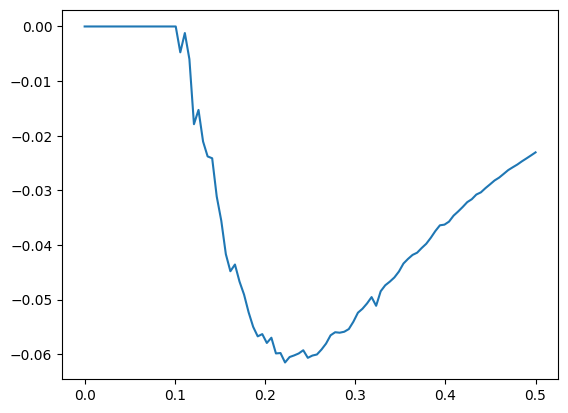

In [16]:
#plt.plot(np.linspace(0,0.5,100),np.array(res)[:,0,0,1,0] )
plt.plot(np.linspace(0,0.5,100),np.array(res)[:,:,1,1,0] )
#plt.ylim(-0.001,0.001)
plt.show()

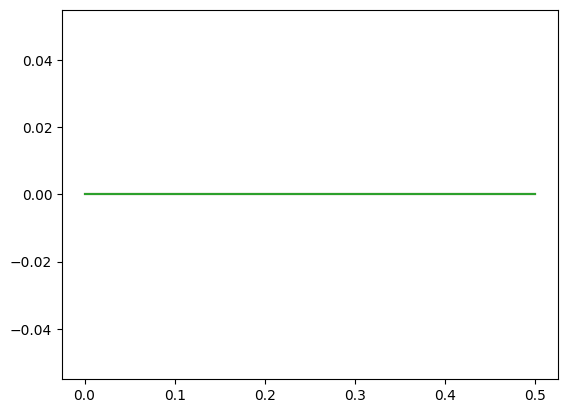

In [9]:
plt.plot(np.linspace(0,0.5,100),np.array(res)[:,0,0,2] )
plt.show()

In [10]:
#system_kp.der2Ham_cart([0.01,0.01,0])

In [11]:
    Efermi = np.linspace(0,0.5,200)
    calculators = { #"BCD":wberri.calculators.static.BerryDipole_kp(Efermi=Efermi, tetra=True ),
                   "BCD":wberri.calculators.static.NLDrude_FermiSurf(Efermi=Efermi),
                  }
    #system_kp.set_symmetry(['Mx'])
    grid = wberri.Grid(system_kp, NK=[200,200,1], NKFFT=[10,10,1] )
    result_runB = wberri.run(system_kp,
            grid=grid,
            calculators = calculators,
            parallel=parallel,
            adpt_num_iter=0,
            fout_name='kp',
            restart=False,
            #print_Kpoints=False
            #file_Klist="Klist_ahc.pickle"  # needed to restart a calculation in future
            )
    #res.append(result_run.results["X1"].data)
                #+ result_run.results["X2"].data )

Drude conductivity (:math:`S^2/A`)

        | With Fermi surface integral.
        | Output: :math:`\sigma_{\alpha\beta\gamma} = e^3/\hbar^2 \tau^2 \int [dk] \partial_\beta v_\alpha v_\gamma f'`
        | Instruction: :math:`j_\alpha = \sigma_{\alpha\beta\gamma} E_\beta E\gamma`

determining grids from NK=[200, 200, 1] (<class 'list'>), NKdiv=None (<class 'NoneType'>), NKFFT=[10, 10, 1] (<class 'NoneType'>)
The grids were set to NKdiv=[20 20  1], NKFFT=[10 10  1], NKtot=[200 200   1]
Grid is regular
The set of k points is a Grid() with NKdiv=[20 20  1], NKFFT=[10 10  1], NKtot=[200 200   1]
generating K_list
Done in 0.01424407958984375 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.029235124588012695 s 
Done in 0.029652118682861328 s 
K_list contains 400 Irreducible points(100.0%) out of initial 20x20x1=400 grid
Done, sum of weights:0.9999999999999897
iteration 0 - 400 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.000000 ,    0.0

processing 400 K points : using  8 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing    400 K-points on   8 processes:     2.2587 ; per K-point          0.0056 ; proc-sec per K-point          0.0452
time1 =  0.02379322052001953
Totally processed 400 K-points 


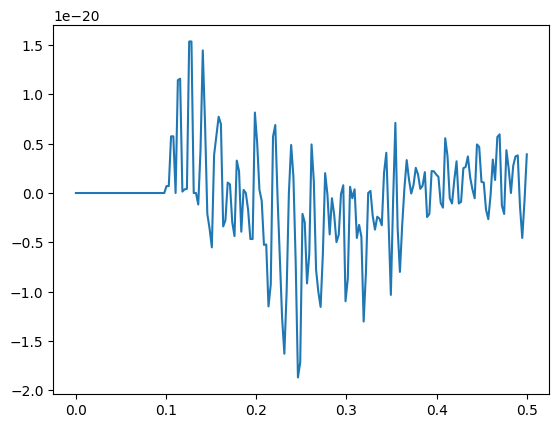

In [12]:
plt.plot(np.linspace(0,0.5,200), result_runB.results["BCD"].data[:,1,0,0] )
plt.show()

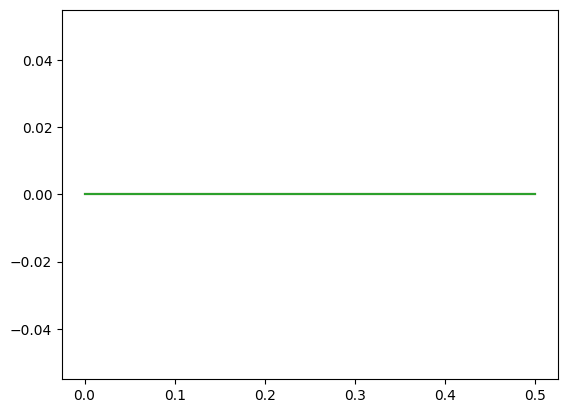

In [13]:
plt.plot(np.linspace(0,0.5,200), result_runB.results["BCD"].data[:,0,2] )
#plt.ylim(-0.001,0.022)
plt.show()

Local node IP: 127.0.0.1

--------------------
Ray runtime started.
--------------------

To terminate the Ray runtime, run
  ray stop


In [4]:
!ray stop

Stopped all 4 Ray processes.


In [10]:
import numpy as np

In [43]:
data = np.loadtxt('kp-BCD_iter-0097.dat')

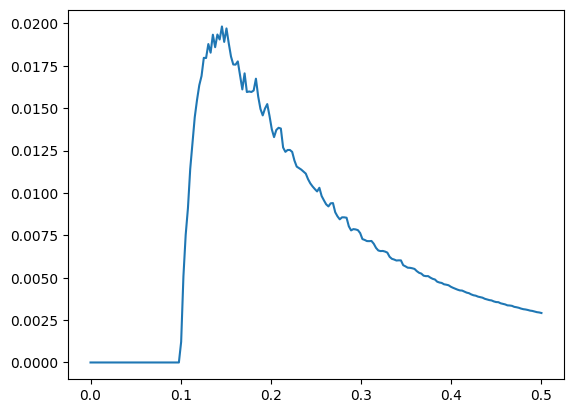

In [45]:
plt.plot(data[:,0],data[:,1:10].reshape(200,3,3)[:,0,2])
plt.show()

In [13]:
np.shape(data)

(200, 19)